# Applying Support Vector Machines and Logistic Regression on the Fashion MNIST dataset
In this short tutorial we will focus on understanding the differences between using SVMs or Logistic Regression for a defined task: predicting an item of fashion from a benchmark dataset, the Fashion MNIST dataset. We will look in more depth at their per-class performance, as well as the shape of their decision boundaries. Finally, we'll perform some hyperparameter tuning for the SVM model, for whose best setting we'll report the test results.

## Fashion MNIST labels
As described [here](https://github.com/zalandoresearch/fashion-mnist), the dataset contains 60k training examples, and 10k testing examples. Each training example is accompanied with a respective label, which can either be:
- 0 	T-shirt/top
- 1 	Trouser
- 2 	Pullover
- 3 	Dress
- 4 	Coat
- 5 	Sandal
- 6 	Shirt
- 7 	Sneaker
- 8 	Bag
- 9 	Ankle boot

## Library import
We will first load all necessary libraries as well as some helper functions that will make some things easier for us. More specifically, from ```sklearn.linear_model``` we import ```LogisticRegression``` , and import ```SVC``` from ```sklearn.svm```. We will also use ```PCA``` for visualizing the decision boundaries of our predictors in two dimensions, and ```cross_val_score``` as well as ```KFold``` for choosing our best model.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from helpers import *

/home/federicoarenasl/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


Now that we have imported all the tools we need, we can start by loading our data.

In [2]:
# Load Data
DataPath = 'data'
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(DataPath)

Let's make a copy of the original data, since we'll make further transformations to ```Xtrn, Ytrn, Xtst```, and ```Ytst```.

In [3]:
# Make backup
Xtrn_orig, Xtst_orig = Xtrn, Xtst

Let's prepare our data for our anlayisis by normalizing the data. This simply consists in converting the data range from 0 to 255, to 0 and 1, as well as substracting the mean from all the samples in the dataset. More on this [here](https://www.educative.io/edpresso/data-normalization-in-python).

In [4]:
# Divide elements
Xtrn = np.divide(Xtrn, 255)
Xtst = np.divide(Xtst, 255)

In [5]:
# Calculate means
Xmean = Xtrn.mean(axis=0)

In [6]:
# Substract means
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

Now, let's only take a subset of our samples for developing our models. We will use the full set when training the final model. For now, we'll only use 1000 samples from our training and testing data.

In [7]:
set_Xtrn_nm = Xtrn_nm[:1000]
set_Xtst_nm = Xtst_nm[:1000]
set_Ytrn = Ytrn[:1000]
set_Ytst = Ytst[:1000]

Now that our data is ready, let's check the performance of a vanilla Logistic Regression model, as well as the performance of a vanilla Support Vector Machine model.

## Logistic Regression multi-class performance
To train our Logistic Regression (LR) model, we can simply summon the ```LogisticRegression``` class from ```sklearn.linear_models```, and since this is a multi-class problem, we'll want the accuracy of the model, as well as its confusion matrix. To do this, we use the ```confusion_matrix``` method from ```sklearn.metrics```.

LR Model's accuracy: 0.79


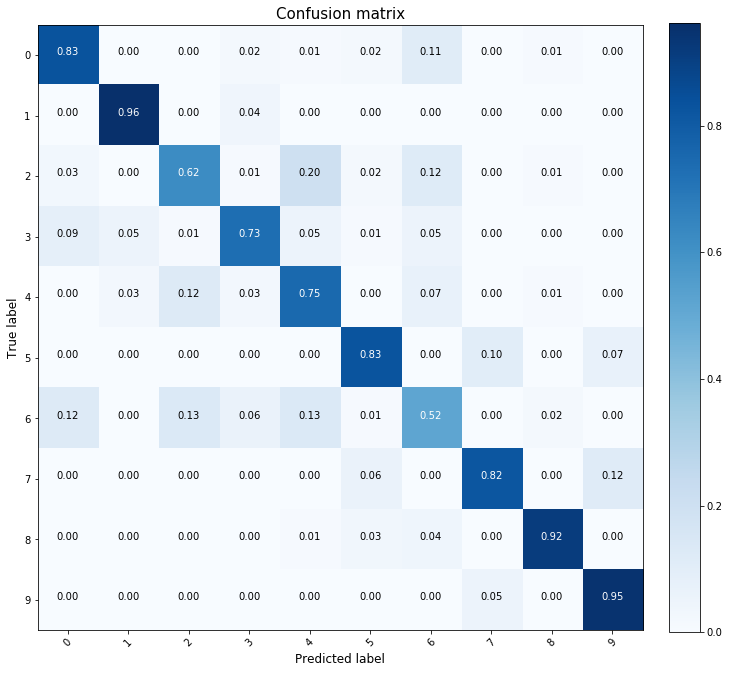

In [8]:
# Initialize Multinomial Logistic Regression Model
LR = LogisticRegression()
LR.fit(set_Xtrn_nm, set_Ytrn)

# Predict labels according
Y_pred = LR.predict(set_Xtst_nm)

# Print accuracy on test data and labels
accuracy = LR.score(set_Xtst_nm, set_Ytst)

# Print Confusion Matrix
conf_matrix =  confusion_matrix(set_Ytst, Y_pred)

PlotConfusionMatrix(conf_matrix, list(range(0,10)), normalize=True)
print(f"LR Model's accuracy: {accuracy}") 

From these results we can see that the classifier has significantly greater difficulty to classify class 6, as it miss-classifies significant amount of samples as class 1, 2 and 4. On the contrary, it performs very well classifying classes 1, 5, 7, and 9, since it does not miss-classify a significant amount of samples.

## Support Vector Machine multi-class performance
To train our Logistic Regression (LR) model, we can simply summon the ```SVC``` class from ```sklearn.svm```, and since this is a multi-class problem, we'll want the accuracy of the model, as well as its confusion matrix. To do this, we use the ```confusion_matrix``` method from ```sklearn.metrics```.

SVM Model's accuracy: 0.728


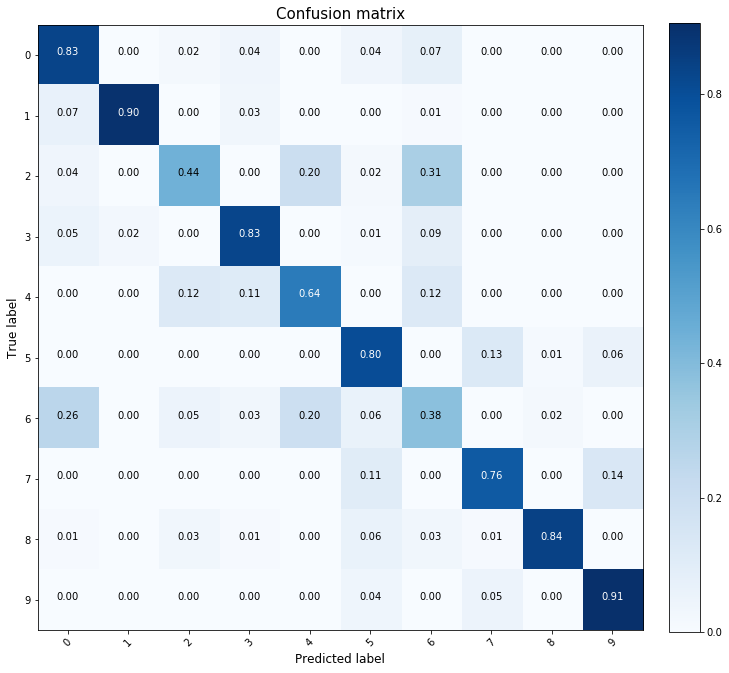

In [9]:
# Initialize C-Support Vector classifier
SVM = SVC(kernel="rbf", C = 1.0,gamma="auto")
# Fit classifier
SVM.fit(set_Xtrn_nm, set_Ytrn)

# Predict labels according
Y_pred = SVM.predict(set_Xtst_nm)

# Print accuracy on test data and labels
accuracy = SVM.score(set_Xtst_nm, set_Ytst)

# Print Confusion Matrix
conf_matrix =  confusion_matrix(set_Ytst, Y_pred)

print(f"SVM Model's accuracy: {accuracy}") 
PlotConfusionMatrix(conf_matrix, list(range(0,10)), normalize=True)

As we can see from the confusion matrix above, the classifier has greater difficulty on correctly classifying class 6, since it miss-classifies it as class 0, 2 or 4. On the contrary, it specifically performs very well on classes 1, 3, 5, 7 and 9, with small amounts of samples being miss-classified as different classes.

## Visualizing the Decision Boundaries of our LR classifier
Now, we're going to perform something more interesting, in order to understand the nature of our classifier. We're going to create a grid of 2D points, project these points to a 784 dimensional space, predict these data points with our trained LR Model, and project this back to the 2D space. We will finally plot the results to have a complete decision boundary of our model.

Text(0.5,1,'Decision surface of Logisitic Regression')

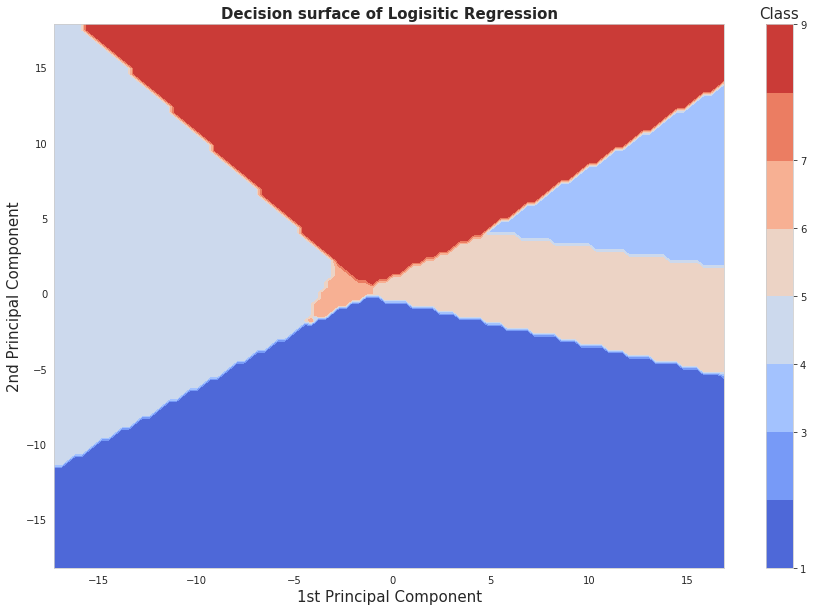

In [10]:
# Initialize PCA object
pca = PCA(n_components=2)

# Fit PCA to normalized data with no components
Z = pca.fit_transform(Xtrn_nm)

# Principal Components
V = pca.components_

# First and second PC
Z_x = Z[0]
Z_y = Z[1]

# Standard deviations of both components
std_x = np.std(Z_x)
std_y = np.std(Z_y)

# Grid parameters
x_min, x_max = -5*std_x, 5*std_x
y_min, y_max = -5*std_y, 5*std_y
x_step = std_x/10
y_step = std_y/10

# Create grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

# Projected points into PC plane
z = np.c_[xx.ravel(), yy.ravel()]

# Revert projection
x = np.dot(z,V)

# Make prediction
LogReg = LR
predictions = LogReg.predict(x)

predictions = predictions.reshape(xx.shape)

# Plot decision boundaries
sns.set_style("whitegrid")
plt.figure(figsize = (15,10))
contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm)
clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)),
                        ticks=list(np.unique(predictions)),spacing='proportional')
clb.ax.set_title('Class', fontsize=15)
plt.xlabel('1st Principal Component', fontsize = 15)
plt.ylabel('2nd Principal Component', fontsize = 15)
plt.title("Decision surface of Logisitic Regression", fontweight = 'bold', fontsize=15)

As we can see, the decision boundaries are clearly linearly defined for this classifier. However, around the center of the plot the decision boundaries are very narrwoly close together. This means that the classifier will have a harder time making a correct prediction for data points situated around the center of the 2D Principal Component space. Finally, we can see that only 8 classes are captured in this decision boundary, which means that some of the classes are being combined in this cross-section of the decision space.

## Visualizing the Decision Boundaries of our SVM classifier
We now perform the same process on our Support Vector Machines classifier.

Text(0.5,1,'Decision surface of Support Vector Machine')

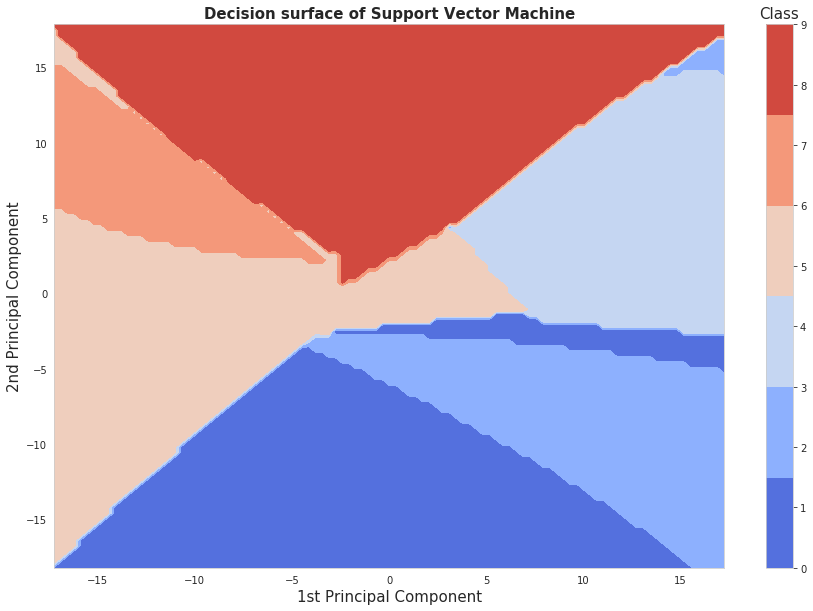

In [31]:
# Initialize PCA object
pca = PCA(n_components=2)

# Fit PCA to normalized data with no components
Z = pca.fit_transform(Xtrn_nm)

# Principal Components
V = pca.components_

# First and second PC
Z_x = Z[0]
Z_y = Z[1]

# Standard deviations of both components
std_x = np.std(Z_x)
std_y = np.std(Z_y)

# Grid parameters
x_min, x_max = -5*std_x, 5*std_x
y_min, y_max = -5*std_y, 5*std_y
x_step = std_x/10
y_step = std_y/10

# Create grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

# Projected points into PC plane
z = np.c_[xx.ravel(), yy.ravel()]

# Revert projection
x = np.dot(z,V)

# Make prediction
predictions = SVM.predict(x)
predictions = predictions.reshape(xx.shape)

# Plot decision boundaries
sns.set_style("whitegrid")
plt.figure(figsize = (15,10))
contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm)
clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)),
                        ticks=list(np.unique(predictions)),spacing='proportional')
clb.ax.set_title('Class', fontsize=15)
plt.xlabel('1st Principal Component', fontsize = 15)
plt.ylabel('2nd Principal Component', fontsize = 15)
plt.title("Decision surface of Support Vector Machine", fontweight = 'bold', fontsize=15)


Comparing this plot to the previous one we can see that the boundaries are much less clearly defined, and certainly not linear. Areas such as those around the point(-4,0) are more difficult for the classifier, and thus points that are situated around this point can be easily miss-classified. Finally, we can see that only 6 colors are captured
in this decision boundary, but the color bar shows up to 10 classes. This means that some of the classes are being combined in this cross-section of the decision space. This makes the SVM perform worse under a PCA 2D transformation than the LR, because the former has more colors and thus less classes that are being combined.

## SVM Hyperparameter tuning via 3-fold cross-validation
Since our SVM model performed better, we now concetrate our efforts in finding the best penalty C value. The C value controls the complexity of the decision boundaries from the SVM by penalizing the the system for misclassifying data points. More on this [here](https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167). 

We will try 10 C values ranging from 0.02 to $10^3$. For each of these 10 numbers we'll train three cross-validated models, and we will output the Mean Cross Validation (MCV) score from the three models.

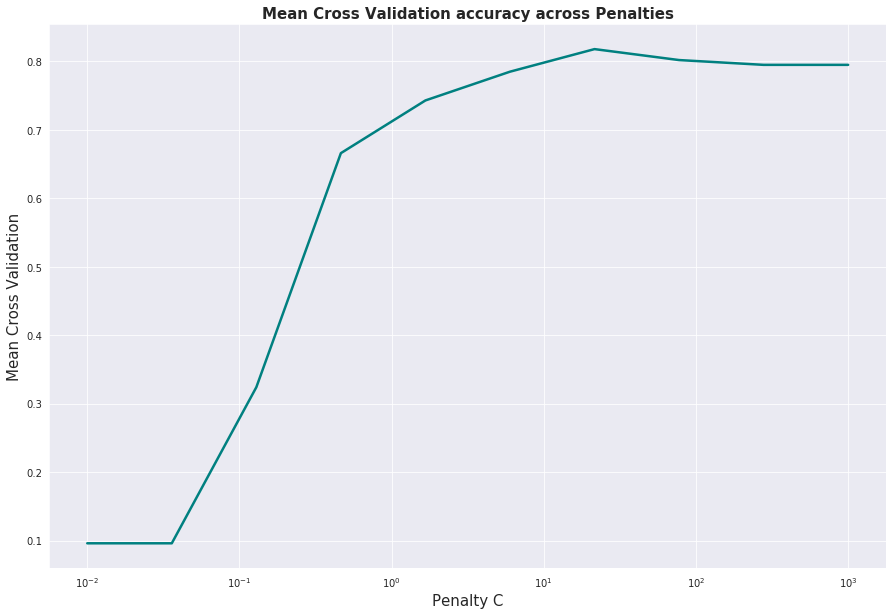

In [33]:
# Set plot specifications
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,10))
lw = 2.5

# Create dataset with normalized data and labels
xtrn_ytrn_data = pd.concat([pd.DataFrame(data=Xtrn), pd.DataFrame(data=Ytrn, columns=['class'])]
                , axis=1).sort_values(by=['class'])

# Create small samples of data to speed up training
Xsmall = pd.concat([xtrn_ytrn_data[xtrn_ytrn_data['class']==i].iloc[:100, :-1] for i in range(0,10)], axis=0).values
Ysmall = pd.concat([xtrn_ytrn_data[xtrn_ytrn_data['class']==i].iloc[:100, -1] for i in range(0,10)], axis=0).values

# Shuffle data
Xsmall, Ysmall = shuffle(Xsmall, Ysmall)

# Create logspace to loop over
Cs = np.logspace(-2,3, num=10)

# Mean Cross Validation accuracy calculation
MCV_list = []

for C in Cs:
    # Initialize RBF Kernel SVM classifier
    current_svm = SVC(kernel='rbf', C=C)
    kf = KFold(n_splits=3, random_state=1, shuffle=True)
    # Cross validation 3-Fold scores        
    mean_crossval = np.mean(cross_val_score(current_svm, Xsmall, Ysmall, cv=kf))
    MCV_list.append(mean_crossval)
    #print("On C=", C, "\tMCV=", mean_crossval)


plt.plot(Cs, MCV_list, color= 'teal', linewidth = lw)
plt.title("Mean Cross Validation accuracy across Penalties" ,fontsize=15, fontweight="bold")
plt.xlabel('Penalty C', fontsize = 15)
plt.xscale("log")
plt.ylabel('Mean Cross Validation', fontsize = 15)
plt.show()

From this experiment we find that the Highest Mean Accuracy is ```85.67%``` and the
optimal value of C that yielded it is ```21.5443```.

## Training our final SVM model on the full dataset
Finally, we train the best SVM model on the complete 60k images from our dataset and report the test results from this fully trained model.

In [10]:
# Initialize C-Support Vector classifier
optimal_C = 21.544346900318846 # From Q2.5
final_svm = SVC(kernel='rbf', C=optimal_C)
# Fit classifier
final_svm.fit(Xtrn_nm, Ytrn)

# Predict labels according
Ytst_pred = final_svm.predict(Xtst_nm)

# Print accuracy on test data and labels
tst_accuracy = final_svm.score(Xtst_nm, Ytst)
trn_accuracy = final_svm.score(Xtrn_nm, Ytrn)

print(f"Train Accuracy: {trn_accuracy}")
print(f"Test Accuracy: {tst_accuracy}")

Train Accuracy: 0.9084166666666667
Test Accuracy: 0.8765
